In [1]:
from keras.datasets import mnist
from keras.utils import np_utils

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

from keras.layers import Dropout, Flatten, Conv2D, MaxPooling2D

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import sys
import os

In [2]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('학습셋 이미지 수 : %d 개' %(X_train.shape[0]))
print('테스트셋 이미지 수 : %d 개' %(X_test.shape[0]))

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


In [4]:
train = np.array(X_train, dtype='float32')
test = np.array(X_test, dtype='float32')

In [5]:
print(train.shape)
print(type(train))

(60000, 28, 28)
<class 'numpy.ndarray'>


In [6]:
print(test.shape)
print(type(test))

(10000, 28, 28)
<class 'numpy.ndarray'>


In [7]:
import random

33772 번째 이미지


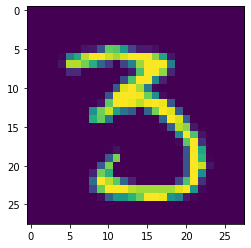

In [8]:
i = random.randint(1,60000)
image = np.reshape(train[i], [28,28])
plt.imshow(image)
print(i,'번째 이미지')

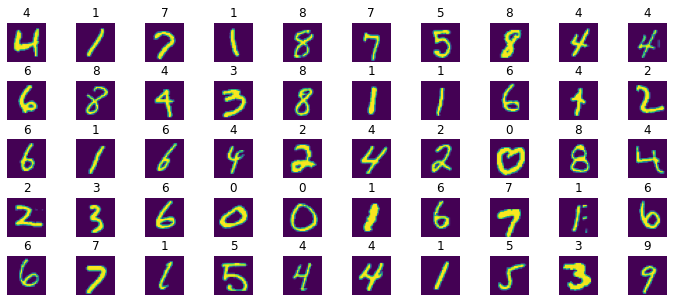

In [9]:
# 그리드 형식으로 이미지 출력 
W_grid = 5
L_grid = 10
fig, axes = plt.subplots(W_grid, L_grid, figsize=(12,5)) 

axes = axes.ravel() # 2차원 타입을 1차원 타입으로 평면화 
n_train = len(train) # 트레이닝 데이터셋의 길이를 n_train에 할당, 60000 이 할당됨  

for i in np.arange(0, W_grid * L_grid):  
    index = np.random.randint(0, n_train)  # 60,000개의 트레이닝 데이터셋 중에서 랜덤 값 선택  

    axes[i].imshow( train[index,0:].reshape((28,28)) )  # 준비된 이미지 28x28(784 pixel)에 적합하게 이미지 출력    
    axes[i].set_title(Y_train[index], fontsize=12) #이미지 출력 시, label을 출력 
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.5, wspace=0.4)  # 서브 플롯 레이아웃 너비와 높이의 간격 비율

In [10]:
X_train = X_train.reshape(X_train.shape[0], 28,28,1).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0], 28,28,1).astype('float32')/255

Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

#### CNN 모델링 (Feature Extraction 추가)

In [11]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
# 모델 최적화
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [13]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, 
                    verbose=0, callbacks=[early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 0.05428, saving model to ./model/01-0.0543.hdf5

Epoch 00002: val_loss improved from 0.05428 to 0.03938, saving model to ./model/02-0.0394.hdf5

Epoch 00003: val_loss improved from 0.03938 to 0.03696, saving model to ./model/03-0.0370.hdf5

Epoch 00004: val_loss improved from 0.03696 to 0.03236, saving model to ./model/04-0.0324.hdf5

Epoch 00005: val_loss improved from 0.03236 to 0.03097, saving model to ./model/05-0.0310.hdf5

Epoch 00006: val_loss improved from 0.03097 to 0.02937, saving model to ./model/06-0.0294.hdf5

Epoch 00007: val_loss did not improve from 0.02937

Epoch 00008: val_loss did not improve from 0.02937

Epoch 00009: val_loss did not improve from 0.02937

Epoch 00010: val_loss did not improve from 0.02937

Epoch 00011: val_loss improved from 0.02937 to 0.02764, saving model to ./model/11-0.0276.hdf5

Epoch 00012: val_loss did not improve from 0.02764

Epoch 00013: val_loss improved from 0.02764 to 0.02629, saving model to

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [15]:
model.evaluate(X_test, Y_test)[1]

313/313 [==============================] - 2s 5ms/step - loss: 0.0272 - accuracy: 0.9937


0.9937000274658203

In [16]:
print('\n Test Accuracy : %.4f' %(model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 2s 5ms/step - loss: 0.0272 - accuracy: 0.9937

 Test Accuracy : 0.9937


In [17]:
y_vloss = history.history['val_loss']
print('len(y_vloss) :', len(y_vloss))

len(y_vloss) : 23


In [18]:
y_loss = history.history['loss']
print('len(y_loss) :', len(y_loss))

len(y_loss) : 23


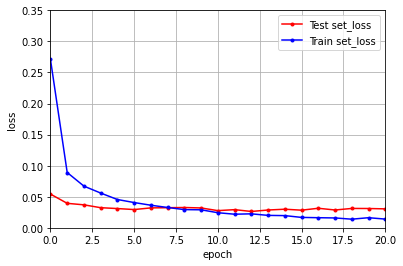

In [19]:
plt.figure(figsize=(6,4))   
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Test set_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Train set_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')  # 범례 위치 지정 후 출력 
plt.axis([0, 20, 0, 0.35])  #x축, y축 값 표현 
plt.grid()  # 그리드 출력 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [20]:
(X_tr, Y_tr), (X_te, Y_te) = mnist.load_data()
print(Y_te)

[7 2 1 ... 4 5 6]


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


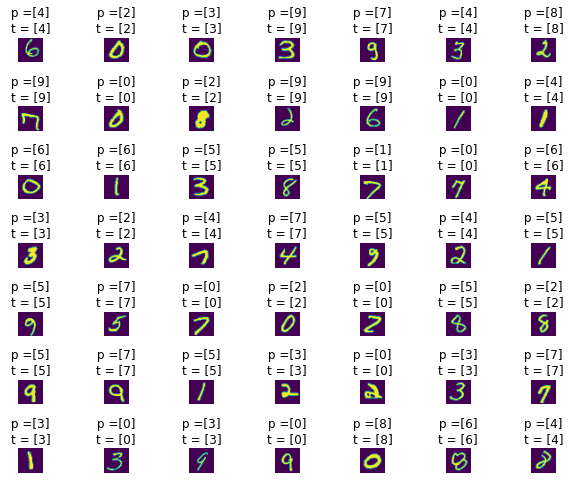

In [21]:
W_grid = 7
L_grid = 7
fig, axes = plt.subplots(W_grid, L_grid, figsize=(10,8)) 

axes = axes.ravel() 
n_test = len(X_te)  

for i in np.arange(0, W_grid * L_grid):  
    index = np.random.randint(0, n_test)   
    
    # X_test = X_test.reshape(X_test.shape[0], 28,28,1).astype('float32')/255
         
    axes[i].set_title(f' p ={model.predict_classes(X_test[[index]])} \nt = {(Y_te[[index]])}') 
    axes[i].imshow( train[index,0:].reshape((28,28)) )
    axes[i].axis('off')

plt.subplots_adjust(hspace=1.8, wspace=0.9)